# US Heart Patients Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [2]:
us=pd.read_csv("/kaggle/input/heart-patients/US_Heart_Patients.csv")
us.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Data Cleaning

In [4]:
us.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
us=us.drop("education",axis=1)

In [6]:
us.shape

(4240, 15)

In [7]:
us.dropna(subset=['BPMeds'],inplace=True)

In [8]:
us.totChol.describe()

count    4138.000000
mean      236.652247
std        44.483930
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [9]:
us["totChol"].fillna(us["totChol"].mean(),inplace=True)

In [10]:
us.BMI.describe()

count    4168.000000
mean       25.803486
std         4.076441
min        15.540000
25%        23.070000
50%        25.405000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [11]:
us["BMI"].fillna(us["BMI"].mean(),inplace=True)

In [12]:
us.dropna(subset=['heartRate'],inplace=True)

In [13]:
us.glucose.describe()

count    3800.000000
mean       81.955526
std        24.041682
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [14]:
us["glucose"].fillna(us["glucose"].mean(),inplace=True)

In [15]:
us.dropna(subset=['cigsPerDay'],inplace=True)

In [16]:
us.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Exploratory Data Analysis

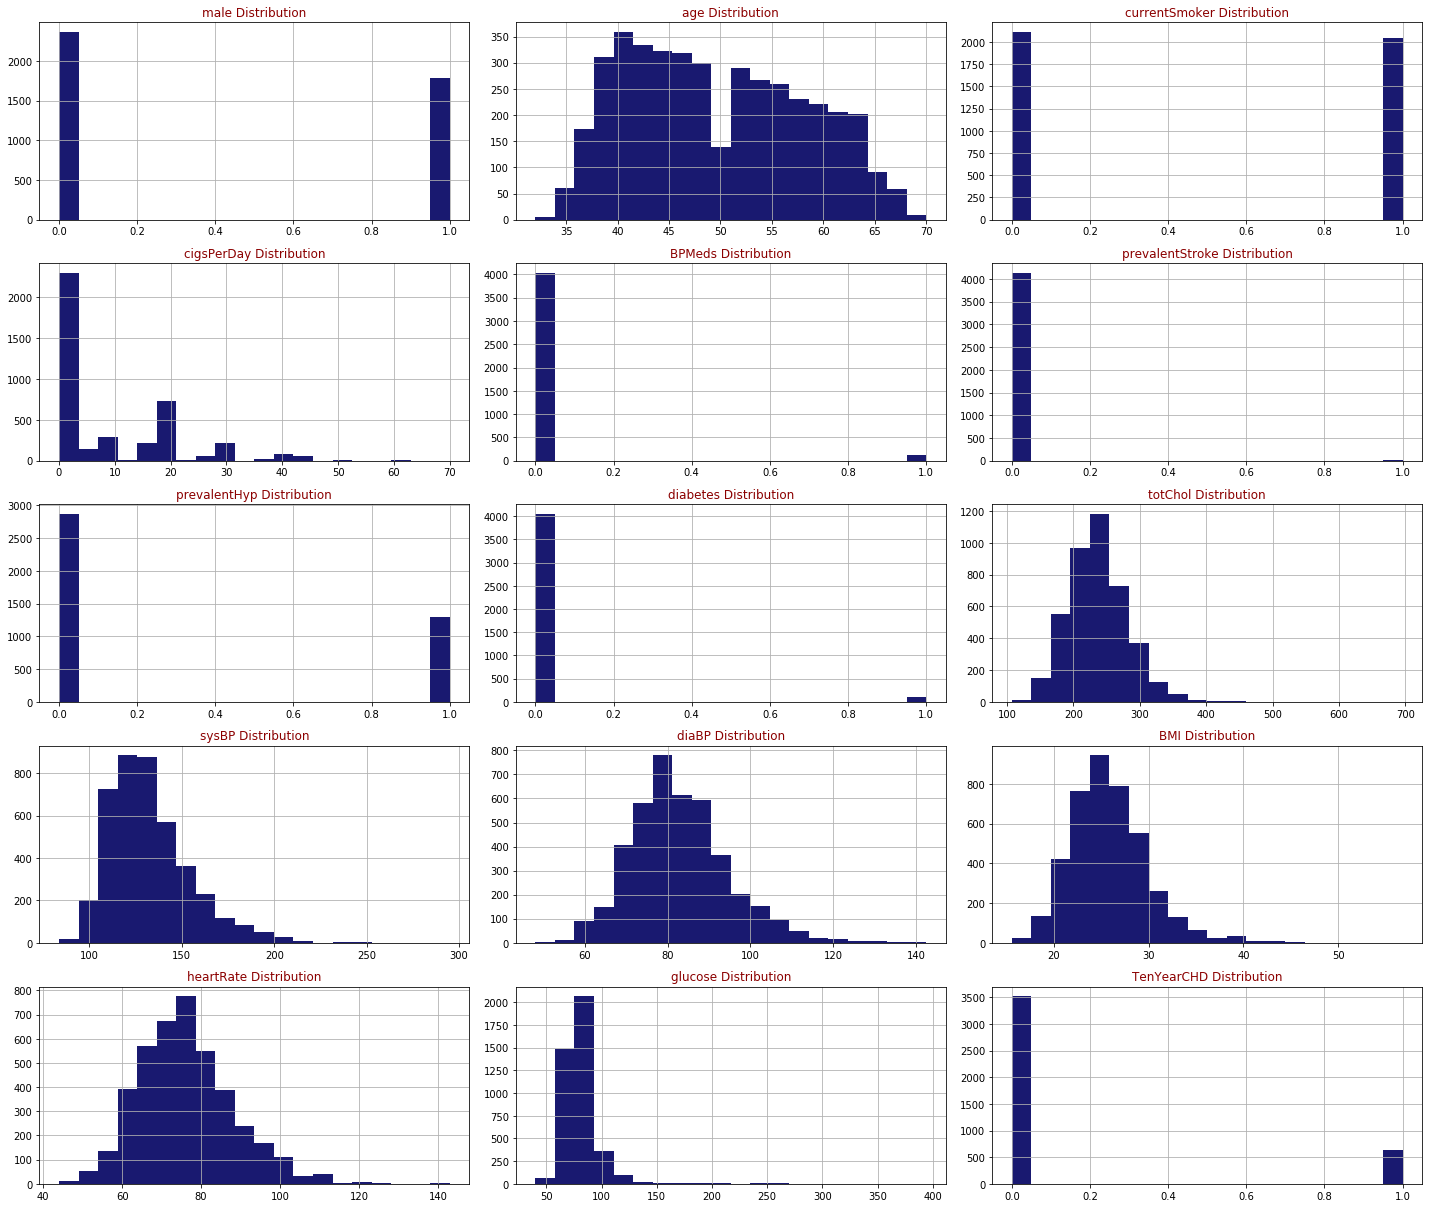

In [17]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(us,us.columns,6,3)

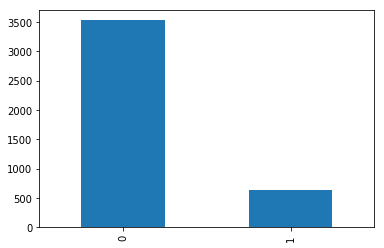

In [18]:
us.TenYearCHD.value_counts().plot.bar()
plt.show()

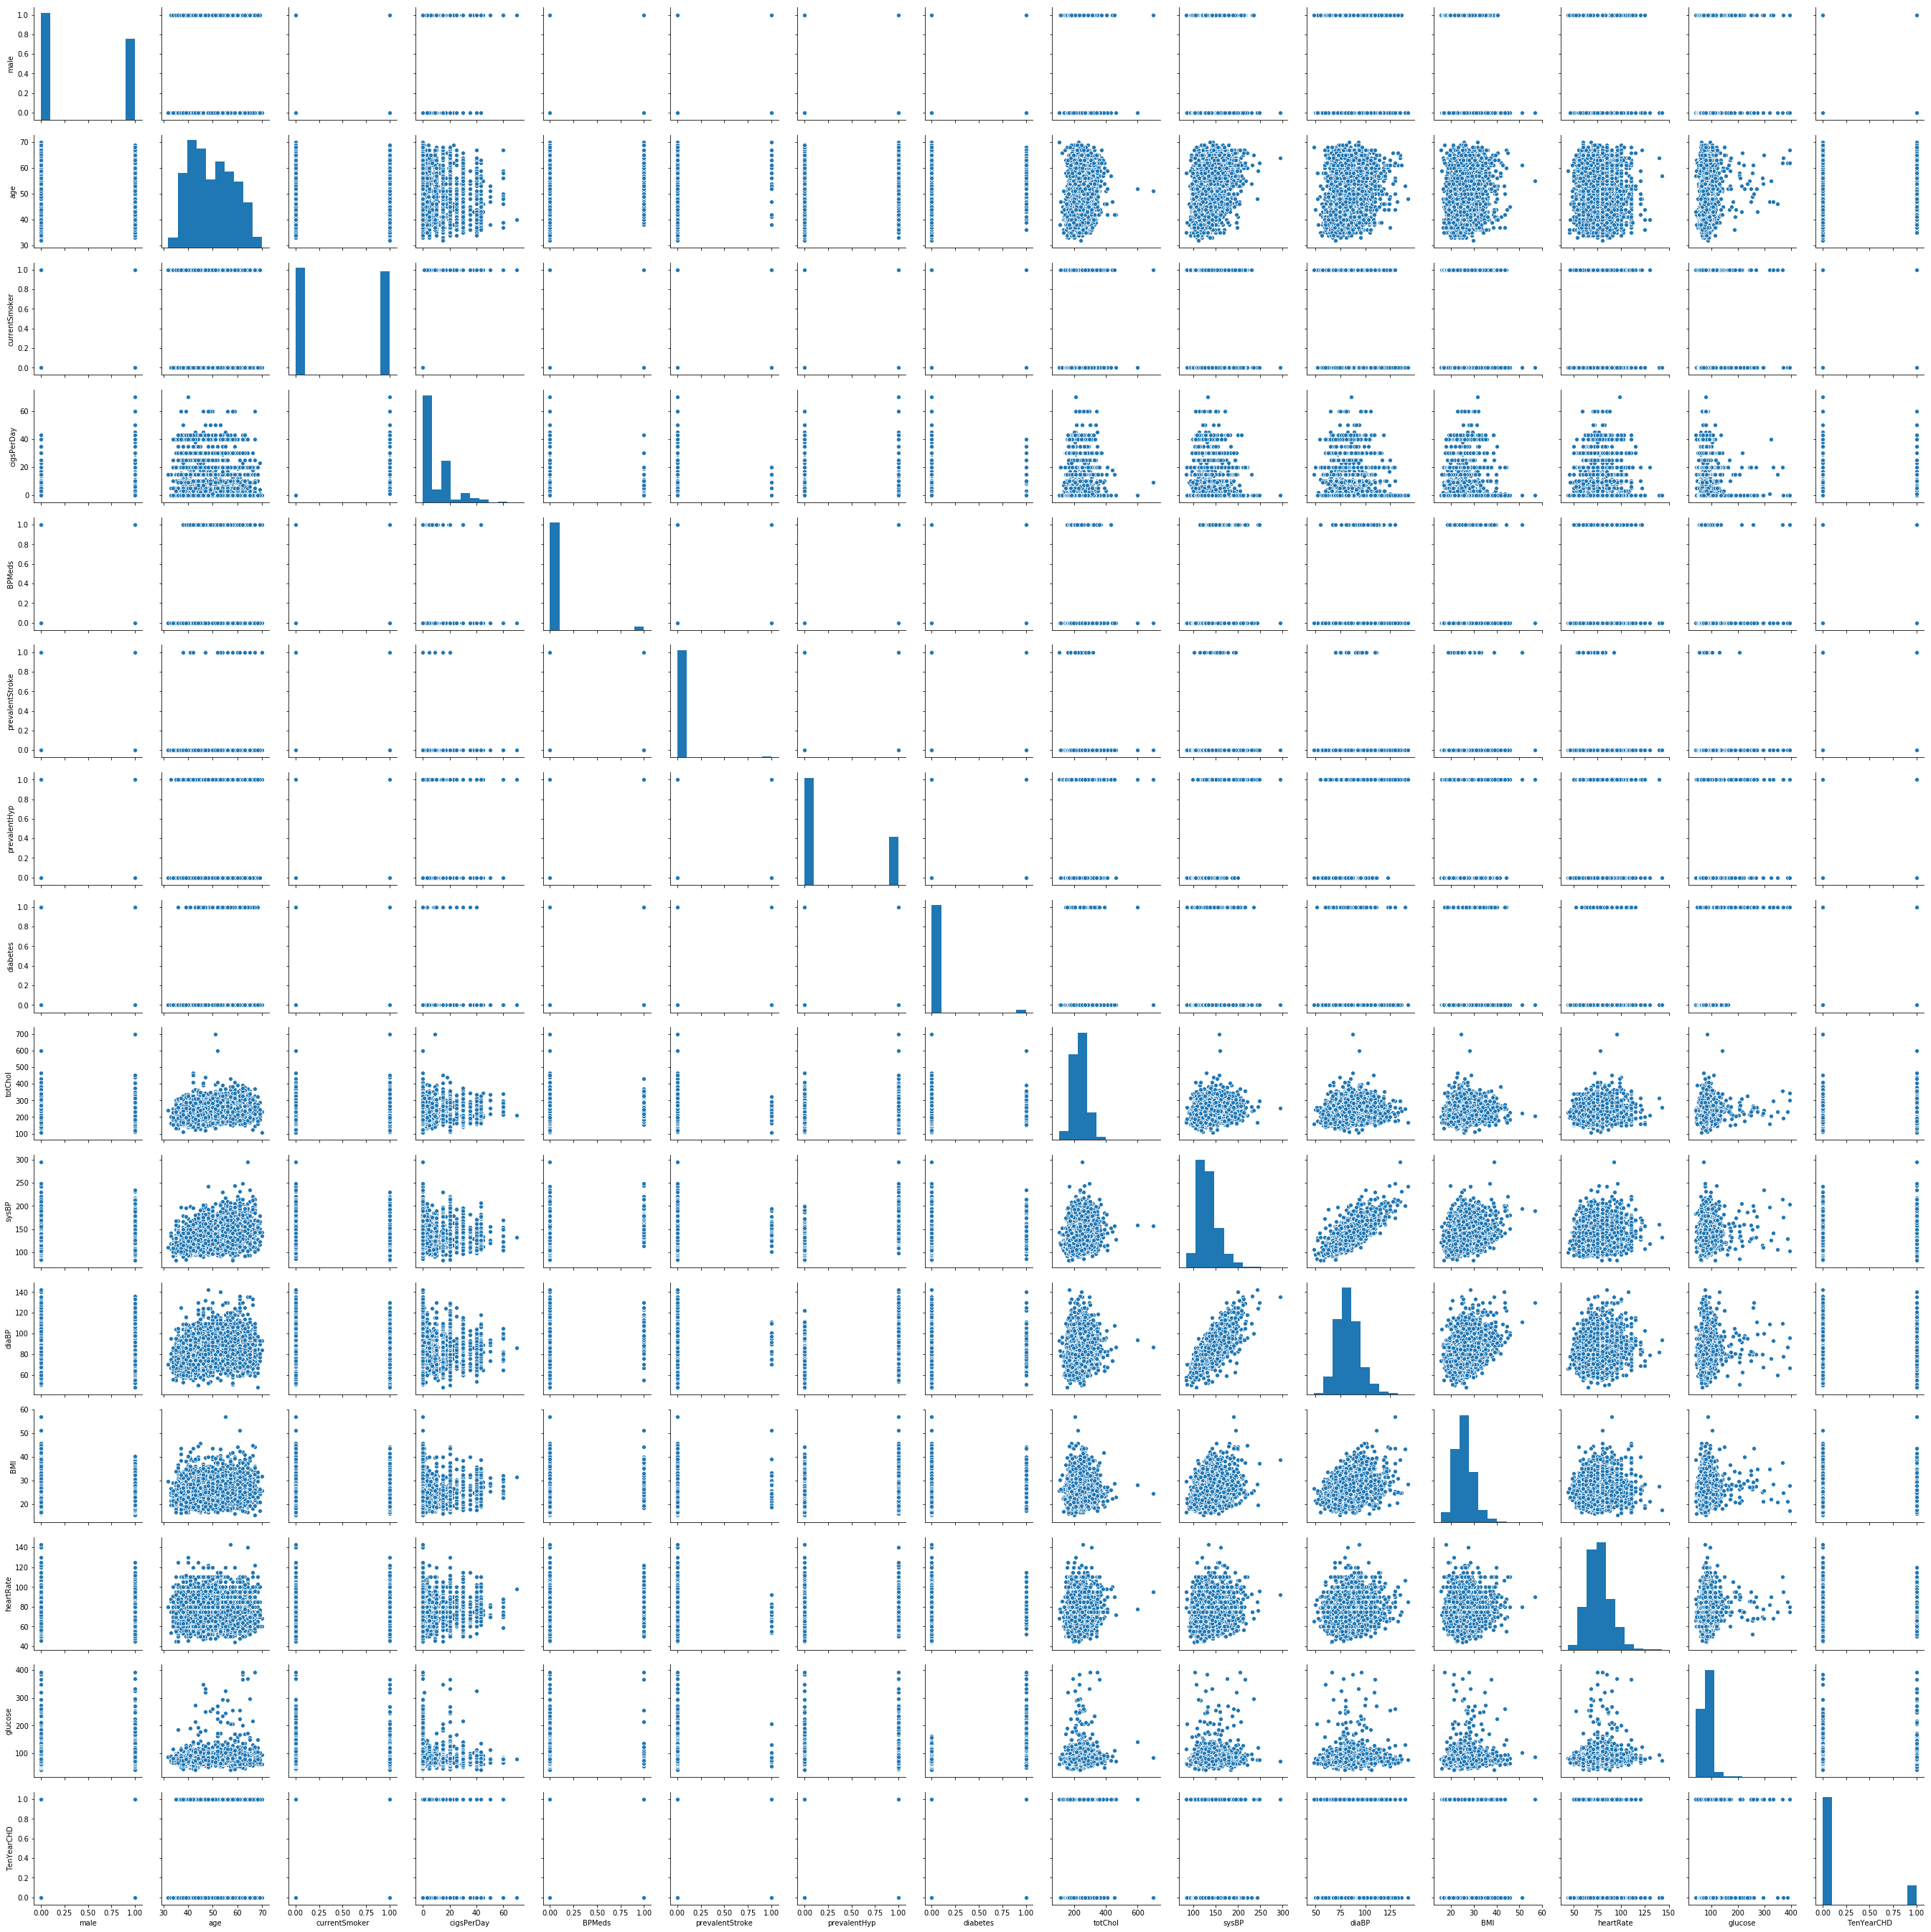

In [19]:
sns.pairplot(data=us)
plt.show()

In [20]:
us.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4157.0,0.430599,0.495220,0.00,0.00,0.00,1.00,1.0
age,4157.0,49.528506,8.564536,32.00,42.00,49.00,56.00,70.0
currentSmoker,4157.0,0.491220,0.499983,0.00,0.00,0.00,1.00,1.0
cigsPerDay,4157.0,9.014433,11.920364,0.00,0.00,0.00,20.00,70.0
BPMeds,4157.0,0.029829,0.170136,0.00,0.00,0.00,0.00,1.0
prevalentStroke,4157.0,0.005773,0.075772,0.00,0.00,0.00,0.00,1.0
prevalentHyp,4157.0,0.309598,0.462384,0.00,0.00,0.00,1.00,1.0
diabetes,4157.0,0.025740,0.158377,0.00,0.00,0.00,0.00,1.0
totChol,4157.0,236.605716,44.200179,107.00,206.00,234.00,262.00,696.0
sysBP,4157.0,132.280370,21.983813,83.50,117.00,128.00,143.50,295.0


## Splitting data into train and test

In [21]:
X=us.drop(['TenYearCHD'],axis=1)
y=us['TenYearCHD']
print(X.shape,y.shape)

(4157, 14) (4157,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decison Tree 

In [23]:
dtr=DecisionTreeClassifier(random_state=100,max_depth=4,min_samples_leaf=2)
dtr.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [24]:
gini_pred=dtr.predict(X_test)

In [25]:
gini_train=dtr.predict(X_train)

In [26]:
print('accuracy for train:',accuracy_score(y_train,gini_train))
print('accuracy for test:',accuracy_score(y_test,gini_pred))
print('difference between train and test:',accuracy_score(y_train,gini_train)-accuracy_score(y_test,gini_pred))
print('Classification Report:\n',classification_report(y_test,gini_pred))

accuracy for train: 0.8621519422481952
accuracy for test: 0.8325320512820513
difference between train and test: 0.029619890966143925
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1037
           1       0.57      0.04      0.07       211

    accuracy                           0.83      1248
   macro avg       0.70      0.52      0.49      1248
weighted avg       0.79      0.83      0.77      1248



In [27]:
entropy_dtr=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=100,max_depth=4,min_samples_leaf=1,min_samples_split=3)
entropy_dtr.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [28]:
entropy_pred=entropy_dtr.predict(X_test)

In [29]:
entropy_train=entropy_dtr.predict(X_train)

In [30]:
print('accuracy for train:',accuracy_score(y_train,entropy_train))
print('accuracy for test:',accuracy_score(y_test,entropy_pred))
print('difference between train and test:',accuracy_score(y_train,entropy_train)-accuracy_score(y_test,entropy_pred))
print('Classification Report:\n',classification_report(y_test,entropy_pred))

accuracy for train: 0.8631832244757649
accuracy for test: 0.8301282051282052
difference between train and test: 0.03305501934755972
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.91      1037
           1       0.46      0.03      0.05       211

    accuracy                           0.83      1248
   macro avg       0.65      0.51      0.48      1248
weighted avg       0.77      0.83      0.76      1248



## Random Forest

In [31]:
rfc = RandomForestClassifier(random_state=42)

In [32]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rfc, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
Time taken in grid search:  11.05


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
rfc_fit=rfc.set_params(criterion = 'gini',max_features = 'auto',max_depth = 3,bootstrap=True)

In [34]:
rfc_fitted=rfc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
rfc_predict=rfc.predict(X_test)

In [36]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1037
           1       0.00      0.00      0.00       211

    accuracy                           0.83      1248
   macro avg       0.42      0.50      0.45      1248
weighted avg       0.69      0.83      0.75      1248



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8357371794871795